-----
# OLS Regression with PCA
----


### Notebook Summary

In this notebook, I will build an Ordinary Least Squares (OLS) regression model after performing PCA to see if results are any better from base model. (01-old-linear-regression)

The process includes:

- **Data Loading:** Loading in processed data from 02-data-preprocessing.

- **Perform PCA:** Apply PCA to reduce multicollinearity and features before building OLS regression model.
- **Building OLS Regression Model:** Build a OLS regression model 
- **Model Assessment:** Assess R-squared, MAE and MSE.
- **Model Comparison:** Compare model results to base model.

**NOTE:** Not using the linear_utils class to build model since I am unable to feed in X variables as part of the class, to revisit at a later date.

## Set Up
----

In [39]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

In [13]:
# Accessing Linear_Model_Builder class 
sys.path.append('../../src')

from linear_utils import Linear_Model_Builder  

## Data Loading
------

In [14]:
car_df = pd.read_csv('../../data/car_data_processed.csv', index_col = 0)

In [15]:
car_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,peakrpm,citympg,...,is_six_cylinder,is_three_cylinder,is_two_cylinder,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,...,0,0,0,0,0,0,0,0,1,0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,...,0,0,0,0,0,0,0,0,1,0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,-2.404880,0.685946,-0.288349,-0.262960,-0.953012,...,1,0,0,0,0,0,0,0,1,0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.517266,0.462183,-0.035973,0.787855,-0.186865,...,0,0,0,0,0,0,0,0,1,0
4,0.107110,0.207256,0.230001,0.235942,0.516807,-0.517266,0.462183,-0.540725,0.787855,-1.106241,...,0,0,0,0,0,0,0,0,1,0


### Split independent variables (X) and target variable (y)

In [16]:
my_linear_builder = Linear_Model_Builder(car_df,'price_transformed')

In [17]:
y = my_linear_builder.target

X = my_linear_builder.X

In [18]:
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg',
       'highwaympg', 'enginesize_transformed', 'horsepower_transformed',
       'symboling_-1', 'symboling_-2', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'is_gas', 'is_turbo', 'has_four_doors',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'is_front_wheel_drive', 'is_rear_wheel_drive',
       'is_front_engine', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'is_eight_cylinder', 'is_five_cylinder', 'is_four_cylinder',
       'is_six_cylinder', 'is_three_cylinder', 'is_two_cylinder',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi'],
      dtype='object')

## PCA
-----

### PCA - finding best parameter 'n_components'

In [19]:
my_PCA = PCA()
my_PCA.fit(X)
# transform data 
X_PCA = my_PCA.transform(X)

In [20]:
expl_var = my_PCA.explained_variance_ratio_

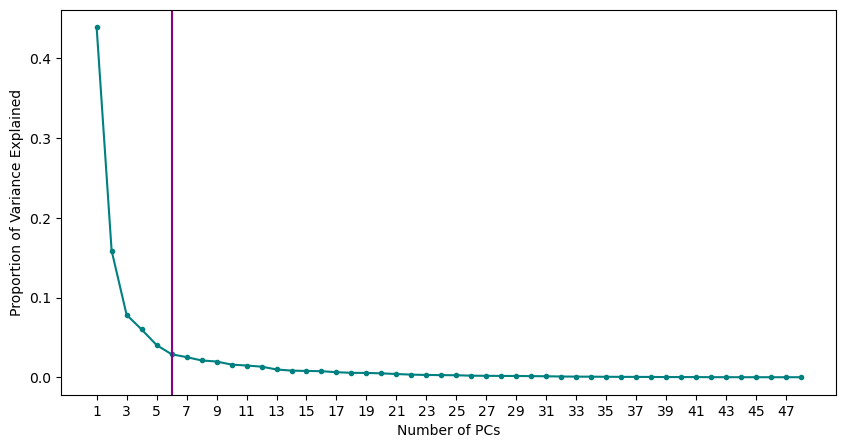

In [22]:
plt.figure(figsize=(10,5))
plt.plot(range(1,49),expl_var,marker='.', color = 'teal')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,49,2))
plt.axvline(6,color='darkmagenta')
plt.show()

**Comments**

Graph shows us the variance explained by each principal component. 

At 6 PCs there is a sharp elbow shape, this is where the plot begins to flatten out. After 6 PCs the amount of additional variance explained by further PCs starts to level off. Therefore 6 seems to be the ideal number of PC to proceed with.

In [24]:
# Instantiate and fit
my_PCA = PCA(n_components = 6) # only takes top 6 to be decided from the plot above
my_PCA.fit(X)

# Transform train and test
X_PCA = my_PCA.transform(X)

In [25]:
print(f'Original: {X.shape}')
print(f'PCA Transformed: {X_PCA.shape}')

Original: (204, 48)
PCA Transformed: (204, 6)


**Comments:**

Number of independent variables is reduced form 48 to 6.

## Building an OLS Regression Model
-----

Will not be using Linear_Model_Builder class to build the model since my independent variables are no longer X variables but principal components. My class is not built to deal with this.

In [26]:
y = car_df['price_transformed']

X = X_PCA

In [30]:
X_with_c = sm.add_constant(X)      
model = sm.OLS(y,X_with_c)
my_model = model.fit()

In [31]:
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_transformed   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           4.56e-83
Time:                        21:52:52   Log-Likelihood:                -84.346
No. Observations:                 204   AIC:                             182.7
Df Residuals:                     197   BIC:                             205.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.026      0.231      0.817      -0.045       0.057
x1             0.3315      0.010     34.524      0.000       0.313       0.350
x2            -0.0556      0.016     -3.485      0.001      -0.087      -0.024
x3             0.0773      0.023      3.398      0.001       0.032       0.122
x4            -0.0626      0.026     -2.409      0.017      -0.114      -0.011
x5             0.2120      0.032      6.695      0.000       0.150       0.274
x6            -0.0816      0.037     -2.178      0.031      -0.156      -0.008
==============================================================================
Omnibus:                       15.462   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.019
Skew:                           0.621   Prob(JB):                     0.000202
Kurtosis:                       3.679   Cond. No.                         3.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comment:**

R-squared value: 0.866

- The OLS model with PCA is able to explain 87% of the variance in the dataset. In other words, the independent variables in summary table explain 87% of varaince seen in y.
- Indicates a strong relationship between the X variables and y, much stronger relationship than base model.
- Improvement seen could be due to:
    - 6 PCs are able to explain most of the variance in the dataset which could in turn explain more of the variance in the target variable.
    - By transforming original X variables into principal components, PCA can discover underlying patterns or relationships in the data that the original data misses.
    



## Model Evalutation
---

In [32]:
# Extracting residuals
residuals = my_model.resid

### Histogram of Residuals

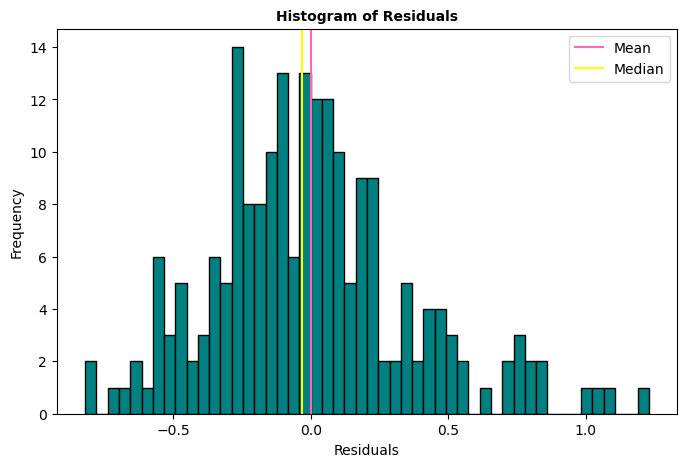

In [37]:
# Plotting histogram of residuals
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=50 ,edgecolor='black', color='teal')
plt.axvline(x=residuals.mean(), color='hotpink', label='Mean')
plt.axvline(x=residuals.median(), color='yellow', label='Median')
plt.title('Histogram of Residuals',fontsize=10, fontweight='bold')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Comments:**

- Residuals do not follow a normal distribution despite mean of the residuals centered at 0
- Difference between mean and median less than base model, slight improvement

### Shaprio-Wilk Hypothesis Test

In [40]:
# Shapiro-Wilk Hypothesis Test
print('Shapiro-Wilk Hypothesis Test')
shap_wilk = stats.shapiro(residuals)

print('Null Hypothesis : Residuals ARE normally distributed')
print('Alternate Hypothesis : Residuals are NOT normally distributed')

if shap_wilk[1] < 0.05:
    print(f'''\nShapiro Wilk Results:\np-value of {round(shap_wilk[1],4)} is less than 0.05, therefore we can reject the null hypothesis and assume the alternate hypothesis holds true
            ''')

else:
    print(f'''\nShapiro Wilk Results:\np-value of {round(shap_wilk[1],4)} is greater than or equal to 0.05, therefore we can reject the null hypothesis and assume the alternate hypothesis holds true
            ''')

Shapiro-Wilk Hypothesis Test
Null Hypothesis : Residuals ARE normally distributed
Alternate Hypothesis : Residuals are NOT normally distributed

Shapiro Wilk Results:
p-value of 0.0006 is less than 0.05, therefore we can reject the null hypothesis and assume the alternate hypothesis holds true
            


**Comments:**

- Hypothesis test to assess how well the residuals conform to a normal distribution
- Since p-values is less than 0.05 we can reject the null hypotheisis and so the data is not normally distributed.

### QQ-Plot

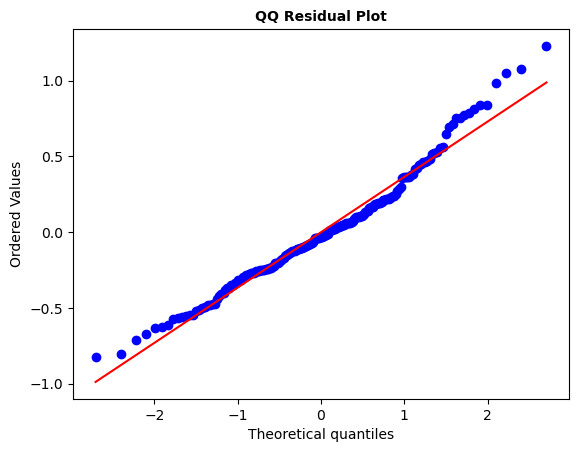

In [41]:
plt.figure()
stats.probplot(residuals, plot=plt,dist='norm')
plt.title('QQ Residual Plot',fontsize=10, fontweight='bold')
plt.show()

**Comments:**

- Plots the actual residuals from final model against residuals which follow a normal distribution.
- Model residuals do not lie/follow the line of normally distributed residuals, residuals are not normally distributed. 
- However in comparison to baseline OLS model, the residuals of model with PCs is closer to the line of normally distributed residuals. This may be due to PCs explaining most of variance in the data leading to residuals closer to normal.





### Homo/Hetero-scedasticity of Residuals

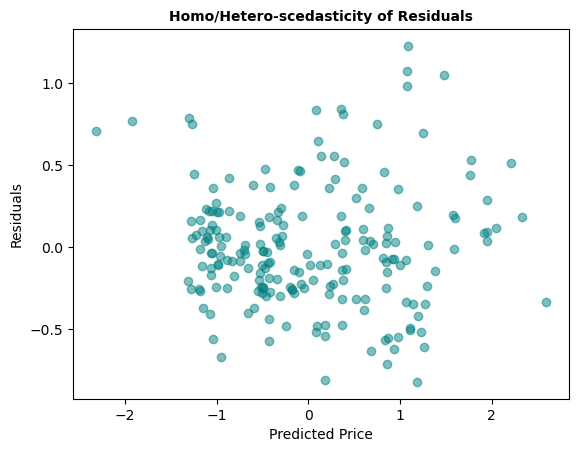

In [42]:
# Homo/Hetero-scedasticity of Residuals
pred_y = my_model.predict(X_with_c)
plt.figure()
plt.scatter(x= pred_y, y=residuals, alpha=0.5, color='teal') 
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Homo/Hetero-scedasticity of Residuals',fontsize=10, fontweight='bold')
plt.show()

**Comments:**

- Homoschedasticity describes case where the spread of residuals is constant for all predicted values of y (price)
- Constant variance of residuals, looks as if the residuals of PCA model are homoschedastic unlike base model residuals.
- Could be due to PCA represenation of the data. 

## Model Evaluation
----

In [43]:
# Using my_final_model to make predictions
pred_y = my_model.predict(X_with_c)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, pred_y)
mse = mean_squared_error(y, pred_y)

In [45]:
print(f"mean_absolute_error [MAE]: {mae.round(4)}")
print(f" mean_squared_error [MSE]: {mse.round(4)}")

mean_absolute_error [MAE]: 0.2782
 mean_squared_error [MSE]: 0.1339


- **MAE: 0.2782**
    - On average, the models predictions are 0.2782 units off from the actual value of y.
    
- **MSE: 0.1339**
    - On average, the squared difference of predictions from actual y is 0.1339 units.


## Model Comparison
----

| Model | R<sup>2<sup/>| MSE   | MAE   | Number of Features|
|-------|--------------|-------|-------|-------------------|
| Base  | 0.645        | 0.354 | 0.448 | 5                 |
| + PCA | 0.866        | 0.134 | 0.278 | 6                 |

**1. R-squared**

- The OLS model with PCA is able to explain 87% of the variance in the dataset. In other words, the independent variables in summary table explain 87% of varaince seen in y.
- Indicates a strong relationship between the X variables and y, much stronger relationship than base model.
- Improvement seen could be due to:
    - 6 PCs are able to explain most of the variance in the dataset which could in turn explain more of the variance in the target variable.
    - By transforming original X variables into principal components, PCA can discover underlying patterns or relationships in the data that the original data misses.
    

**2. Mean Squared Error (MSE):**

- The MSE for the PCA model is substantially lower, suggesting that the model where PCA is applied has less fewer prediction errors.

**3. Mean Absolute Error (MAE):**

- The MAE for the PCA model is lower, suggesting improved prediction accuracy and a closer fit to the actual values of y.


## Conclusion
----

The application of PCA to the OLS regression model has led to an improvement in model performance.

The PCA model explains a higher proportion of the variance in the target variable, shows lower prediction errors and meets assumption 4 (homoschedasticity of residuals).

This demonstrates the effectiveness of PCA in improving model accuracy and reliability.

However since our features are now principal components (linear combinations of original features) our model is less explaianble as it is hard to explain what each PC represents in a business sense.

**Next Steps:**

- Assessment:
    - Use train/test split in order to perform a more rigourous test on model's performance
    - By testing the model on unseen data, we can assess the ability of the model to generalise.
    - Compare ability to generalise to baseline model.
